**3-class Iris classification.** - Iris plants dataset

***Group - 25***

*Kuppala Navya - 2022H1400125H*

*Saloni Sharma - 2022H1400121H*



**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica


**Expected Output:**

-Visualize the data points using the pair plot.

-Split the dataset into training and testing with test set size of 33%.

-Train a one vs rest logistic regression model and present the confusion matrix and accuracy on the test data.


In [1]:
#Code to generate data points.
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

data = load_iris(as_frame=True)
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
df = data['frame'] #frame is one of the keys from the above dictionary. Choose #an appropriate key as per your requirement.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


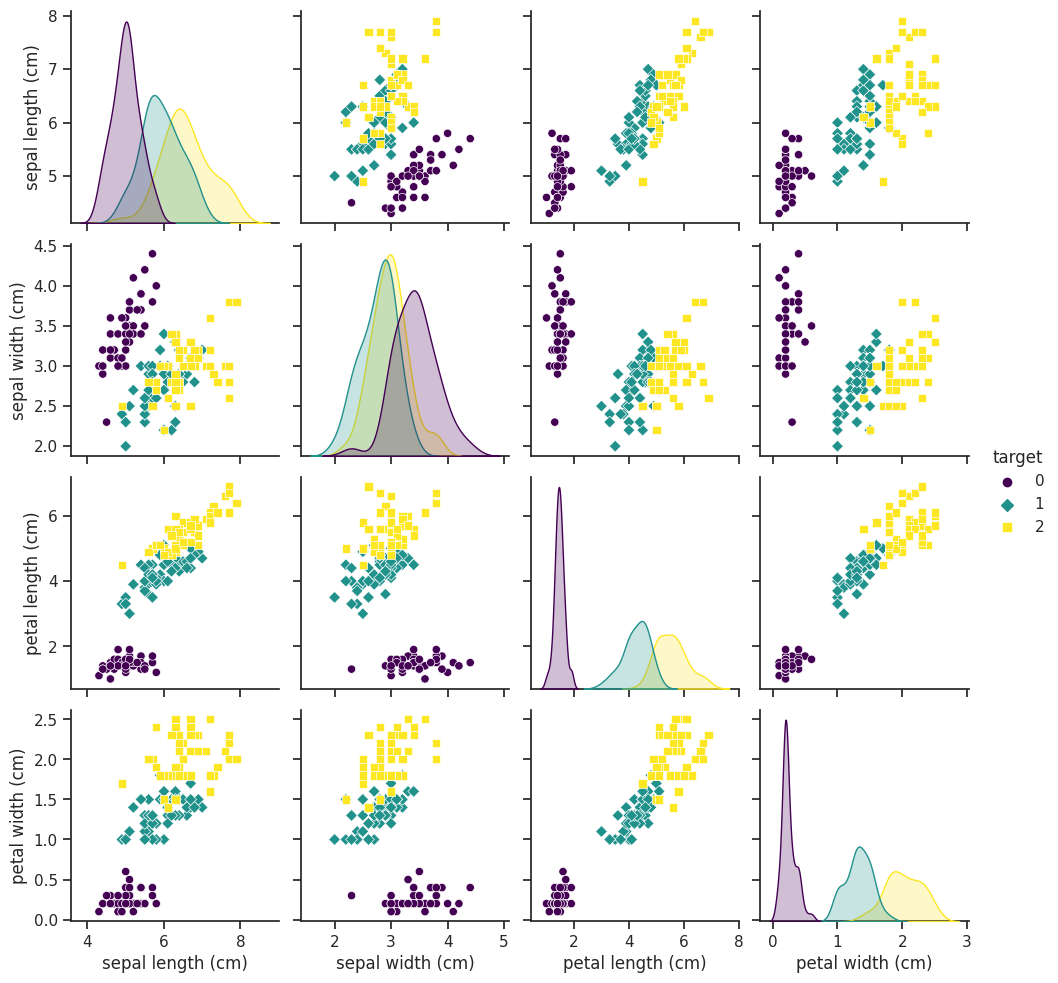

In [3]:
#Visualize the data points using the pair plot
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="target", palette="viridis", markers=["o", "D", "s"])

In [4]:
#Splitting the data into test and train datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]].values
y = df["target"].values
# X.head()
# y.head()
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [5]:
#OneVsRest Model Training
strategy = LogisticRegression(multi_class="ovr")
strategy.fit(x_train,y_train)
y_pred = strategy.predict(x_test)

In [6]:
#Performance Metrics
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print("Accuracy Score:\n",accuracy_score(y_test,y_pred))
print("Accuracy of the model is:\n",accuracy_score(y_test,y_pred)*100)

Confusion Matrix:
 [[16  0  0]
 [ 0 16  2]
 [ 0  0 16]]
Accuracy Score:
 0.96
Accuracy of the model is:
 96.0


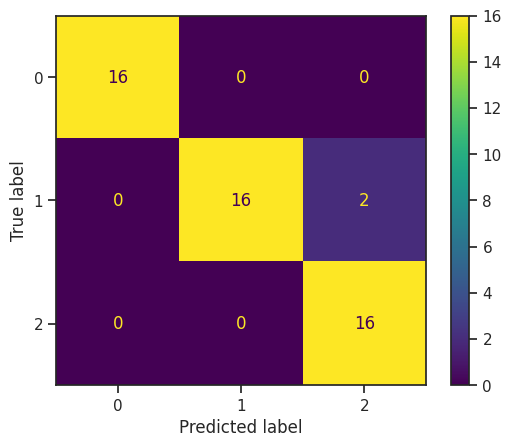

In [7]:
#Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=strategy.classes_)
disp.plot()